In [60]:
import pandas as pd
import nltk
from nltk import sent_tokenize
from nltk import word_tokenize
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from wordcloud import WordCloud
from nltk.stem import WordNetLemmatizer

In [16]:
df = pd.read_csv("Amazon Review Data.csv")

In [17]:
Reviews = []

for text in df['reviews.text']:
    Reviews.append(text)

In [21]:
words = []
for review in Reviews:
    words = words + word_tokenize(review)

In [25]:
len(words)

174223

In [27]:
fdist = FreqDist(words)

In [28]:
fdist.most_common(10)

[('.', 10454),
 ('the', 5767),
 ('to', 4998),
 ('and', 4947),
 ('I', 4659),
 ('it', 4320),
 (',', 3867),
 ('for', 3615),
 ('a', 3409),
 ('is', 3040)]

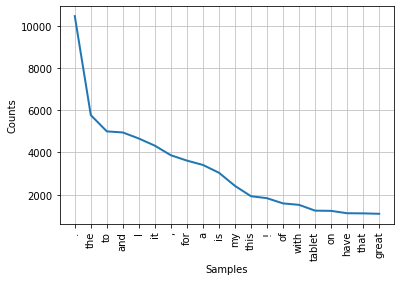

In [31]:
fdist.plot(20)

In [33]:
words_no_punc = []

for w in words:
    if w.isalpha():
        words_no_punc.append(w.lower())

In [34]:
len(words_no_punc)

151957

In [35]:
fdist = FreqDist(words_no_punc)

fdist.most_common(10)

[('the', 6743),
 ('it', 5242),
 ('and', 5021),
 ('to', 5016),
 ('i', 4809),
 ('for', 3716),
 ('a', 3486),
 ('is', 3075),
 ('my', 2871),
 ('this', 2642)]

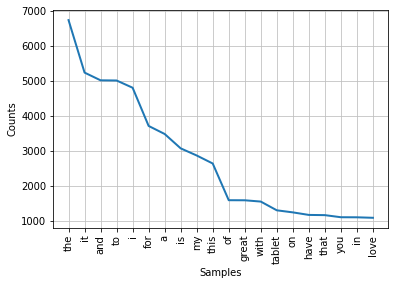

In [36]:
fdist.plot(20)

In [38]:
stopwords = stopwords.words("english")
print(stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [40]:
clean_words = []
No_words = ['n', 'u','hv']

for w in words_no_punc:
    if w not in (stopwords + No_words):
        clean_words.append(w)
        
len(clean_words)

74745

In [41]:
fdist = FreqDist(clean_words)

fdist.most_common(10)

[('great', 1590),
 ('tablet', 1303),
 ('love', 1089),
 ('use', 1081),
 ('easy', 816),
 ('bought', 785),
 ('kindle', 761),
 ('one', 761),
 ('amazon', 715),
 ('echo', 694)]

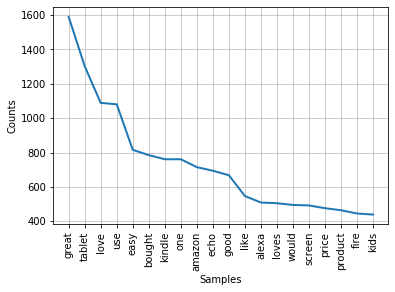

In [42]:
fdist.plot(20)

In [180]:
from collections import Counter
import random

def grey_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(0, 0%%, %d%%)" % random.randint(0,0)

def create_word_cloud(list):
    word_could_dict=Counter(list)
    wordcloud = WordCloud(width = 800, height = 1000, background_color = 'white', colormap = None).generate_from_frequencies(word_could_dict)
    wordcloud.to_file('Amazon.png')
    plt.figure(figsize=(30,16))
    plt.imshow(wordcloud.recolor(color_func=grey_color_func, random_state=3),
           interpolation="bilinear")
    plt.axis("off")
    plt.savefig('Amz.png')

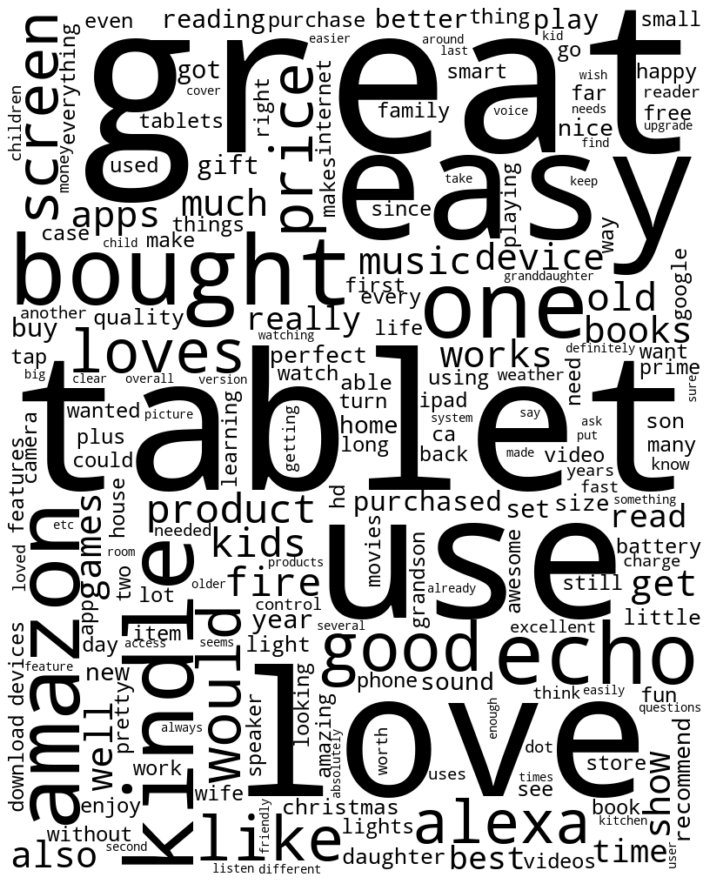

In [181]:
create_word_cloud(clean_words)